In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget -O /content/drive/MyDrive/pamap2.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00231/PAMAP2_Dataset.zip

^C


In [ ]:
!unzip /content/drive/MyDrive/pamap2.zip -d /content/drive/MyDrive/pamap2_data

Archive:  /content/drive/MyDrive/pamap2.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/pamap2.zip or
        /content/drive/MyDrive/pamap2.zip.zip, and cannot find /content/drive/MyDrive/pamap2.zip.ZIP, period.


In [ ]:
import os

data_path = "/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset"  # extracted folder
files = os.listdir(data_path)
print("Total files:", len(files))
print("First 10 files:", files[:10])

Total files: 7
First 10 files: ['DataCollectionProtocol.pdf', 'subjectInformation.pdf', 'PerformedActivitiesSummary.pdf', 'DescriptionOfActivities.pdf', 'readme.pdf', 'Protocol', 'Optional']


In [ ]:
data_path = "/content/drive/MyDrive/pamap2_data"

# saari .dat files list karte hain
dat_files = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".dat"):
            dat_files.append(os.path.join(root, file))

print("Total .dat files:", len(dat_files))
print("Sample files:", dat_files[:5])

Total .dat files: 14
Sample files: ['/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject101.dat', '/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject102.dat', '/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject103.dat', '/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject104.dat', '/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject105.dat']


In [ ]:
import pandas as pd

file_path = "/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol/subject101.dat"

# dataset me delimiter whitespace hota hai
df = pd.read_csv(file_path, delim_whitespace=True, header=None)

print("Shape:", df.shape)
print(df.head())

/tmp/ipython-input-806131563.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


Shape: (376417, 54)
     0   1      2     3        4        5        6        7        8   \
0  8.38   0  104.0  30.0  2.37223  8.60074  3.51048  2.43954  8.76165   
1  8.39   0    NaN  30.0  2.18837  8.56560  3.66179  2.39494  8.55081   
2  8.40   0    NaN  30.0  2.37357  8.60107  3.54898  2.30514  8.53644   
3  8.41   0    NaN  30.0  2.07473  8.52853  3.66021  2.33528  8.53622   
4  8.42   0    NaN  30.0  2.22936  8.83122  3.70000  2.23055  8.59741   

        9   ...        44        45        46       47       48       49   50  \
0  3.35465  ...  0.008300  0.009250 -0.017580 -61.1888 -38.9599 -58.1438  1.0   
1  3.64207  ... -0.006577 -0.004638  0.000368 -59.8479 -38.8919 -58.5253  1.0   
2  3.73280  ...  0.003014  0.000148  0.022495 -60.7361 -39.4138 -58.3999  1.0   
3  3.73277  ...  0.003175 -0.020301  0.011275 -60.4091 -38.7635 -58.3956  1.0   
4  3.76295  ...  0.012698 -0.014303 -0.002823 -61.5199 -39.3879 -58.2694  1.0   

    51   52   53  
0  0.0  0.0  0.0  
1  0.0  0.0  0.0

In [ ]:
columns = [
    "timestamp", "activity", "heart_rate",
    # IMU hand (16 signals)
    "hand_temp", "hand_acc16_x", "hand_acc16_y", "hand_acc16_z",
    "hand_acc6_x", "hand_acc6_y", "hand_acc6_z",
    "hand_gyro_x", "hand_gyro_y", "hand_gyro_z",
    "hand_mag_x", "hand_mag_y", "hand_mag_z",
    "hand_orientation_1", "hand_orientation_2", "hand_orientation_3", "hand_orientation_4",

    # IMU chest (16 signals)
    "chest_temp", "chest_acc16_x", "chest_acc16_y", "chest_acc16_z",
    "chest_acc6_x", "chest_acc6_y", "chest_acc6_z",
    "chest_gyro_x", "chest_gyro_y", "chest_gyro_z",
    "chest_mag_x", "chest_mag_y", "chest_mag_z",
    "chest_orientation_1", "chest_orientation_2", "chest_orientation_3", "chest_orientation_4",

    # IMU ankle (16 signals)
    "ankle_temp", "ankle_acc16_x", "ankle_acc16_y", "ankle_acc16_z",
    "ankle_acc6_x", "ankle_acc6_y", "ankle_acc6_z",
    "ankle_gyro_x", "ankle_gyro_y", "ankle_gyro_z",
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z",
    "ankle_orientation_1", "ankle_orientation_2", "ankle_orientation_3", "ankle_orientation_4",
]

df.columns = columns[:df.shape[1]]
print(df.head())


   timestamp  activity  heart_rate  hand_temp  hand_acc16_x  hand_acc16_y  \
0       8.38         0       104.0       30.0       2.37223       8.60074   
1       8.39         0         NaN       30.0       2.18837       8.56560   
2       8.40         0         NaN       30.0       2.37357       8.60107   
3       8.41         0         NaN       30.0       2.07473       8.52853   
4       8.42         0         NaN       30.0       2.22936       8.83122   

   hand_acc16_z  hand_acc6_x  hand_acc6_y  hand_acc6_z  ...  ankle_gyro_x  \
0       3.51048      2.43954      8.76165      3.35465  ...      0.008300   
1       3.66179      2.39494      8.55081      3.64207  ...     -0.006577   
2       3.54898      2.30514      8.53644      3.73280  ...      0.003014   
3       3.66021      2.33528      8.53622      3.73277  ...      0.003175   
4       3.70000      2.23055      8.59741      3.76295  ...      0.012698   

   ankle_gyro_y  ankle_gyro_z  ankle_mag_x  ankle_mag_y  ankle_mag_z  \
0 

In [ ]:
data_path = "/content/drive/MyDrive/pamap2_data/PAMAP2_Dataset/Protocol"

clients_data = {}

for file in os.listdir(data_path):
    if file.endswith(".dat"):
        subject_id = os.path.splitext(file)[0]  # e.g., subject101
        df = pd.read_csv(os.path.join(data_path, file), sep="\s+", header=None)
        df.columns = columns[:df.shape[1]]

        clients_data[subject_id] = df
        print(f"Loaded {subject_id} with shape {df.shape}")

print("Total subjects loaded:", len(clients_data))

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-521063421.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(os.path.join(data_path, file), sep="\s+", header=None)


Loaded subject101 with shape (376417, 54)
Loaded subject102 with shape (447000, 54)
Loaded subject103 with shape (252833, 54)
Loaded subject104 with shape (329576, 54)
Loaded subject105 with shape (374783, 54)
Loaded subject106 with shape (361817, 54)
Loaded subject107 with shape (313599, 54)
Loaded subject108 with shape (408031, 54)
Loaded subject109 with shape (8477, 54)
Total subjects loaded: 9


In [ ]:
clients_data["subject101"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.008300,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376412,3772.50,0,NaN,30.5,2.02477,7.29553,5.74194,2.06573,6.57692,5.92695,...,0.048745,-0.008034,0.018600,-58.8381,-36.2397,-11.0980,1.0,0.0,0.0,0.0
376413,3772.51,0,NaN,30.5,2.10836,7.86504,5.85674,2.08754,7.42244,5.87977,...,0.042113,0.024647,0.013375,-58.9537,-36.3379,-11.7170,1.0,0.0,0.0,0.0
376414,3772.52,0,NaN,30.5,2.07163,8.39581,5.77742,2.13833,8.05640,5.90853,...,-0.014889,0.026009,0.025054,-59.1781,-35.8985,-10.9678,1.0,0.0,0.0,0.0
376415,3772.53,0,NaN,30.5,2.19569,8.77634,6.00892,2.11251,8.53989,5.93770,...,0.047026,-0.035531,0.024640,-58.8299,-36.6845,-10.8553,1.0,0.0,0.0,0.0


In [ ]:
clients_data["subject102"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.64,0,NaN,33.000,2.791430,7.553890,-7.06374,2.875530,7.888230,-6.76139,...,-0.027148,-0.031190,-0.040897,-47.7695,-2.58701,59.8481,-0.012871,0.747947,-0.079841,0.658813
1,5.65,0,NaN,33.000,2.860860,7.438140,-7.21626,2.842480,7.631640,-6.85140,...,0.012804,-0.036384,-0.014845,-47.7624,-2.81438,60.3407,0.014025,-0.748410,0.079043,-0.658360
2,5.66,0,100.0,33.000,2.809970,7.094300,-7.52376,2.793730,7.435450,-7.07744,...,-0.001695,-0.034529,-0.040074,-47.5393,-2.38909,60.9623,0.012714,-0.749508,0.075286,-0.657577
3,5.67,0,NaN,33.000,2.771380,6.980770,-7.52396,2.806270,7.299290,-7.24326,...,0.055437,-0.011560,0.015434,-47.4246,-2.72082,60.7103,0.012639,-0.749201,0.076030,-0.657843
4,5.68,0,NaN,33.000,2.767100,7.131190,-7.67848,2.787660,7.117970,-7.48445,...,0.017184,-0.034663,0.007239,-47.5412,-2.60153,60.3412,0.012571,-0.749291,0.076346,-0.657705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446995,4475.59,0,NaN,29.125,-0.040828,-0.050765,9.77696,-0.007455,0.010854,9.76395,...,-0.045732,-0.003273,-0.002873,23.2899,13.04520,-52.9575,0.963468,0.150467,-0.152542,-0.160685
446996,4475.60,0,NaN,29.125,-0.004109,-0.013453,9.73890,-0.067866,-0.018901,9.77918,...,0.004529,-0.028774,-0.014796,23.7429,12.91400,-52.5913,0.963511,0.150692,-0.152539,-0.160219
446997,4475.61,0,NaN,29.125,-0.073003,-0.011192,9.93029,-0.067358,0.041505,9.77905,...,-0.016462,0.006235,-0.003494,23.1758,13.05240,-53.2040,0.963689,0.149824,-0.152549,-0.159953
446998,4475.62,0,NaN,29.125,0.189650,0.099912,9.85688,-0.067233,0.026430,9.80928,...,-0.009732,0.004279,-0.011373,23.2890,12.83110,-53.4549,0.963846,0.148631,-0.152432,-0.160234


In [ ]:
clients_data["subject103"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.64,0,81.0,29.5000,-0.232001,9.79451,-1.035580,-0.166991,9.81824,-1.235630,...,-0.006815,-0.012675,0.007382,-12.1093,-8.374710,9.85938,-0.253628,0.690605,-0.224148,0.639136
1,5.65,0,NaN,29.5000,-0.283158,9.60209,-1.382090,-0.182068,9.74291,-1.159950,...,0.022784,0.031235,0.031504,-11.5507,-8.391110,9.60708,0.258358,-0.688526,0.231896,-0.636716
2,5.66,0,NaN,29.5000,-0.165516,9.82952,-1.304120,-0.213218,9.71284,-1.250450,...,0.054938,0.025118,0.023654,-11.4418,-7.958560,9.98214,0.250713,-0.691441,0.223057,-0.639764
3,5.67,0,NaN,29.5000,-0.206246,9.79120,-1.381570,-0.197768,9.74295,-1.235430,...,-0.004807,-0.003744,0.012985,-11.8860,-8.596690,9.36007,0.256182,-0.689624,0.224146,-0.639178
4,5.68,0,NaN,29.5000,-0.051880,9.86659,-1.302540,-0.196751,9.86376,-1.235700,...,0.025017,-0.003953,0.017000,-11.5482,-8.503130,9.72964,0.256551,-0.688970,0.225301,-0.639329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252828,2533.92,0,NaN,28.0625,1.412250,7.77957,-0.041973,0.970555,8.07403,-0.417531,...,0.095279,0.081312,0.089669,-24.7474,-0.434119,27.25270,0.004599,-0.725221,-0.049410,-0.686726
252829,2533.93,0,NaN,28.0625,1.662330,7.62242,-0.422570,1.435440,7.64795,-0.266066,...,0.124343,0.031504,0.088491,-24.6383,-0.433086,26.88050,0.003950,-0.725125,-0.049431,-0.686830
252830,2533.94,0,NaN,28.0625,1.876760,8.14779,-0.882979,1.720910,7.70614,-0.432594,...,0.115377,0.046913,0.057890,-24.9784,0.123937,27.38430,0.003133,-0.724969,-0.049573,-0.686988
252831,2533.95,0,NaN,28.0625,1.987970,8.79021,-1.075920,1.782120,8.20371,-0.826366,...,0.150433,0.022344,0.079808,-24.8587,-0.000322,28.12470,0.002285,-0.724902,-0.049812,-0.687045


In [ ]:
clients_data["subject104"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.71,0,NaN,31.75,-1.54309,5.78581,7.73342,-1.58707,5.77449,7.89554,...,0.024932,-0.033188,0.018301,-46.7519,19.71540,9.44721,0.420604,0.506287,0.601928,0.452159
1,5.72,0,NaN,31.75,-1.69986,5.55834,7.61638,-1.57213,5.75928,7.89556,...,-0.015505,0.036956,-0.014232,-46.5148,20.34600,9.02181,0.424410,0.504851,0.601741,0.450455
2,5.73,0,NaN,31.75,-1.54603,5.55784,7.69566,-1.57276,5.72904,7.85033,...,0.019024,0.022195,0.010928,-46.4840,19.18740,9.59060,0.421472,0.506134,0.601398,0.452228
3,5.74,0,NaN,31.75,-1.57954,5.59708,7.81049,-1.51222,5.75881,7.85020,...,0.012959,-0.004018,-0.026358,-47.5172,19.62440,9.30279,0.421292,0.506310,0.599558,0.454636
4,5.75,0,NaN,31.75,-1.51225,5.55654,7.58071,-1.46764,5.72824,7.80492,...,0.073998,-0.041724,-0.006069,-47.5133,19.88420,10.15350,0.419774,0.508406,0.597869,0.455923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329571,3301.42,0,NaN,27.50,-4.46502,6.40756,-5.86000,-4.63643,6.40272,-6.01052,...,-0.040733,-0.008157,0.012061,-49.3415,6.17912,3.21319,0.541351,0.325573,0.708295,0.315055
329572,3301.43,0,NaN,27.50,-4.62099,6.29390,-5.97741,-4.60692,6.37226,-6.05578,...,-0.044029,0.022003,0.009972,-49.2145,5.91363,2.64662,0.541521,0.325392,0.708135,0.315310
329573,3301.44,0,NaN,27.50,-4.69015,6.44758,-5.82502,-4.62085,6.44792,-5.99553,...,0.041335,-0.025738,0.010537,-49.7247,6.19823,3.21182,0.541395,0.325556,0.708341,0.314893
329574,3301.45,0,NaN,27.50,-4.53525,6.40948,-5.70711,-4.65049,6.44820,-5.93510,...,-0.022402,-0.017382,-0.026576,-49.4637,5.92773,3.21305,0.541216,0.325599,0.708472,0.314862


In [ ]:
clients_data["subject105"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.70,0,NaN,34.0000,2.22755,9.654180,2.38862,2.31968,9.607520,2.58278,...,-0.017907,0.009340,0.050097,-32.7091,31.47720,44.23180,0.255373,0.783075,0.084602,0.560732
1,5.71,0,NaN,34.0000,2.37550,9.576470,2.31412,2.45657,9.621770,2.71852,...,-0.070091,0.002312,0.053832,-33.0782,30.98140,44.51480,0.251163,0.785583,0.076319,0.560314
2,5.72,0,NaN,34.0000,2.94208,9.534150,2.32275,2.78876,9.649610,2.76342,...,-0.084468,0.034249,0.030462,-32.5619,30.69820,44.51690,0.250643,0.786419,0.072038,0.559941
3,5.73,0,NaN,34.0000,3.47541,9.758370,2.40696,3.33080,9.660730,2.68734,...,-0.030789,0.058615,0.055252,-32.8212,30.96900,44.65750,0.250917,0.786967,0.071013,0.559179
4,5.74,0,NaN,34.0000,3.54617,9.832320,2.25382,3.67642,9.718480,2.50565,...,-0.020063,0.020903,0.059653,-33.1869,30.08560,44.51540,0.249631,0.786602,0.066861,0.560777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374778,3753.48,24,NaN,33.8125,-2.43654,-0.655505,-4.72814,-2.35051,-0.635334,-4.91018,...,0.405404,0.242415,0.934088,-46.2344,-5.06546,-2.71978,0.469287,0.059003,0.849955,0.232087
374779,3753.49,24,NaN,33.8125,-2.72148,-0.270088,-4.31035,-2.40802,-0.589344,-4.62331,...,0.882967,0.084749,0.792861,-46.7418,-4.90974,-2.15442,0.470816,0.060165,0.850537,0.226494
374780,3753.50,24,NaN,33.8125,-2.69395,0.229159,-3.61885,-2.50771,-0.376741,-4.14045,...,1.170130,-0.077675,0.563650,-46.7372,-4.90871,-1.72891,0.471456,0.059840,0.851859,0.220192
374781,3753.51,24,NaN,33.8125,-2.62461,0.729121,-2.81126,-2.46646,0.167377,-3.35644,...,1.610350,-0.093296,0.363001,-46.9957,-4.89665,-2.01350,0.471882,0.057498,0.853724,0.212546


In [ ]:
clients_data["subject106"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.89,0,NaN,32.6875,-6.399790,2.58932,6.67079,-6.263680,2.57551,6.98619,...,0.067704,0.001500,-0.011983,-33.6479,27.0146,43.0990,0.220967,0.773766,0.285557,0.520497
1,5.90,0,NaN,32.6875,-6.402460,2.39929,6.63290,-6.204030,2.54483,6.94089,...,0.030155,0.025643,-0.007916,-33.7877,27.1478,42.2474,0.221332,0.773236,0.286219,0.520765
2,5.91,0,NaN,32.6875,-6.477510,2.47575,6.63152,-6.233280,2.60549,6.98609,...,0.067642,-0.028377,0.004280,-34.8053,27.0702,42.3857,0.221819,0.773033,0.286287,0.520822
3,5.92,0,NaN,32.6875,-6.327420,2.70155,6.55603,-6.248980,2.62062,6.89547,...,0.018724,0.012499,0.014775,-33.9116,26.8960,42.1054,0.221836,0.772801,0.287420,0.520535
4,5.93,0,NaN,32.6875,-6.432500,2.55301,6.82437,-6.233410,2.60548,6.97099,...,-0.009428,-0.012789,-0.010744,-34.0416,27.1609,42.3883,0.221799,0.772786,0.288440,0.520008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361812,3624.01,24,NaN,28.0000,-0.882178,8.70779,-4.31308,-1.004060,8.56768,-4.56930,...,0.012887,-0.030320,-0.052600,-38.1725,-10.8938,34.4753,0.115799,-0.760717,0.107397,-0.629576
361813,3624.02,24,NaN,28.0000,-0.770417,8.85800,-4.38889,-0.973539,8.64294,-4.59970,...,0.036581,-0.038851,-0.014018,-38.0362,-11.1572,34.7598,0.115917,-0.760813,0.107263,-0.629461
361814,3624.03,24,NaN,28.0000,-0.934147,8.96963,-4.77659,-0.972269,8.79395,-4.60003,...,0.052564,0.009157,-0.029281,-38.0342,-11.0273,35.1851,0.115904,-0.760801,0.107026,-0.629519
361815,3624.04,24,NaN,28.0000,-0.891542,8.89480,-4.62175,-0.910594,8.89928,-4.53992,...,0.058325,-0.051060,-0.018802,-38.5510,-10.8737,34.8995,0.115799,-0.760983,0.106739,-0.629366


In [ ]:
clients_data["subject107"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.92,0,NaN,29.1875,-9.328890,2.92704,-0.532881,-9.41208,3.05936,-0.562033,...,0.029559,0.007713,-0.014388,-9.36210,-21.5654,46.3611,0.141625,-0.804044,0.198151,-0.542394
1,5.93,0,NaN,29.1875,-9.403930,3.00350,-0.534263,-9.47287,3.07483,-0.637509,...,0.029845,-0.008695,-0.027145,-9.61678,-21.8114,45.9350,0.142771,-0.803685,0.197520,-0.542856
2,5.94,0,NaN,29.1875,-9.374430,2.96326,-0.764610,-9.38220,2.99876,-0.531729,...,0.075590,0.009227,-0.022130,-9.10624,-21.4486,46.6456,0.142506,-0.804043,0.196343,-0.542822
3,5.95,0,NaN,29.1875,-9.334500,2.88776,-0.686782,-9.35205,3.01363,-0.546894,...,0.013660,0.017158,-0.019855,-9.63393,-20.7794,46.3593,0.141952,-0.803949,0.195321,-0.543475
4,5.96,0,NaN,29.1875,-9.288430,2.92742,-0.455302,-9.36700,3.02884,-0.546912,...,0.056091,0.010900,-0.007986,-9.85199,-22.3122,46.7858,0.142409,-0.803859,0.195735,-0.543339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313594,3141.86,5,NaN,32.4375,-16.898100,36.83070,-9.035420,-21.08210,38.29330,-9.642450,...,2.214250,-0.999674,4.130140,-33.85820,-24.2891,18.1954,0.166552,-0.719439,-0.292280,-0.607651
313595,3141.87,5,NaN,32.4375,-10.764300,35.74550,-6.207280,-16.12180,37.59390,-8.724840,...,1.878830,-1.285450,5.018300,-34.90190,-22.6892,19.1827,0.146334,-0.731971,-0.278750,-0.604238
313596,3141.88,5,NaN,32.4375,-5.815250,32.72480,-4.468000,-10.31120,36.01390,-6.160190,...,1.841810,-1.760220,5.733740,-36.21940,-19.9152,20.7350,0.124629,-0.746276,-0.261891,-0.599127
313597,3141.89,5,NaN,32.4375,-2.326410,28.67670,-4.325110,-5.14151,32.76120,-4.663380,...,2.114310,-2.113020,6.359770,-38.41970,-17.4826,22.5682,0.099649,-0.761745,-0.243328,-0.592121


In [ ]:
clients_data["subject108"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,5.89,0,NaN,33.3125,-9.79760,-1.45670,1.014380,-9.70702,-1.60337,1.320980,...,-0.013731,0.010364,0.010731,-35.4550,38.3829,-17.9083,0.546211,0.370903,0.695334,0.283892
1,5.90,0,NaN,33.3125,-9.91204,-1.41822,0.974050,-9.78262,-1.60285,1.290850,...,0.004436,-0.005926,-0.006704,-35.4508,38.2543,-17.7663,0.545806,0.370867,0.695680,0.283872
2,5.91,0,NaN,33.3125,-9.87531,-1.57027,0.975113,-9.78237,-1.57265,1.290790,...,0.022508,-0.002265,0.014646,-35.6984,38.2688,-17.0580,0.545484,0.371607,0.695437,0.284117
3,5.92,0,NaN,33.3125,-9.72175,-1.60870,1.054520,-9.70677,-1.60334,1.351180,...,-0.006964,0.035314,0.010982,-34.9492,38.7447,-17.6233,0.545474,0.372077,0.694859,0.284935
4,5.93,0,NaN,33.3125,-9.79920,-1.49497,0.975999,-9.58657,-1.57408,1.275490,...,-0.015835,-0.001065,-0.000410,-35.2105,38.8857,-17.9080,0.545810,0.372349,0.694122,0.285732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408026,4086.15,0,NaN,30.8125,-9.54108,-2.02884,0.904692,-9.54984,-2.19390,0.884190,...,0.006770,0.036675,0.030725,-38.4279,-16.0602,24.5522,0.284360,-0.711264,0.424078,-0.483116
408027,4086.16,0,NaN,30.8125,-9.42932,-2.06799,0.868011,-9.51907,-2.17897,0.944529,...,0.001383,0.001895,0.028021,-39.0518,-16.2840,25.4013,0.284263,-0.711247,0.424135,-0.483148
408028,4086.17,0,NaN,30.8125,-9.42745,-1.99177,0.906269,-9.45841,-2.13410,0.944368,...,0.014374,-0.015898,0.005044,-38.5541,-16.0535,24.6936,0.284345,-0.711194,0.424146,-0.483167
408029,4086.18,0,NaN,30.8125,-9.47246,-2.06904,0.713419,-9.44308,-2.13418,0.974554,...,0.041315,-0.027977,0.027846,-38.8064,-16.0400,24.9763,0.284147,-0.711210,0.424209,-0.483206


In [ ]:
clients_data["subject109"]

,timestamp,activity,heart_rate,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,...,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,15.47,0,141.0,24.7500,-9.98278,2.61759,2.46038,-10.23410,2.69055,2.45977,...,0.714237,-0.235885,-0.341782,-44.2263,-10.28570,7.363410,0.466904,-0.486197,0.608846,-0.418234
1,15.48,0,NaN,24.7500,-9.75577,2.46441,2.50279,-9.96280,2.56789,2.58057,...,0.238571,-0.279597,-0.536439,-44.3354,-10.79310,8.072780,0.466590,-0.488971,0.607694,-0.417024
2,15.49,0,NaN,24.7500,-10.32720,2.43953,3.45650,-9.96105,2.44737,2.91305,...,-0.122434,-0.307176,-0.737734,-44.4643,-10.65750,8.214000,0.466964,-0.492189,0.607102,-0.413669
3,15.50,0,NaN,24.7500,-10.99920,2.29537,3.71633,-10.53000,2.45190,3.36664,...,-0.347597,-0.349365,-0.938808,-44.2026,-11.18680,7.790040,0.468730,-0.494896,0.606311,-0.409581
4,15.51,0,NaN,24.7500,-10.88630,1.83990,3.79653,-11.07110,2.25982,3.73003,...,-0.469862,-0.457702,-1.059880,-43.4225,-11.86940,7.793570,0.469978,-0.497652,0.605975,-0.405287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8472,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075
8473,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018
8474,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416
8475,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208


In [ ]:
del clients_data["subject109"]

In [ ]:
keep_classes = [1,2,3,4,5,6,7,12,13,16]

In [ ]:
import numpy as np

for subject, df in clients_data.items():
    print(subject, "NaNs remaining:", df.isna().sum().sum())

# Columns to drop
drop_cols = [
    "timestamp", "heart_rate",

    # Hand magnetometer
    "hand_mag_x", "hand_mag_y", "hand_mag_z",

    # Chest magnetometer
    "chest_mag_x", "chest_mag_y", "chest_mag_z",

    # Ankle magnetometer
    "ankle_mag_x", "ankle_mag_y", "ankle_mag_z"
]

# Apply drop to all subjects
cleaned_clients = {}

for subject, df in clients_data.items():
    df_cleaned = df.drop(columns=[col for col in drop_cols if col in df.columns])
    df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)
    df_cleaned = df_cleaned.interpolate(method='linear', limit_direction='both', axis=0).fillna(0)
    cleaned_clients[subject] = df_cleaned
    print(f"{subject}: original {df.shape[1]} → cleaned {df_cleaned.shape[1]} columns")

for subject, df in cleaned_clients.items():
    print(subject, "NaNs remaining:", df.isna().sum().sum())

# Example: check first few columns of subject101
print(cleaned_clients["subject101"].columns)

subject101 NaNs remaining: 397958
subject102 NaNs remaining: 500742
subject103 NaNs remaining: 250681
subject104 NaNs remaining: 359437
subject105 NaNs remaining: 405721
subject106 NaNs remaining: 375280
subject107 NaNs remaining: 332553
subject108 NaNs remaining: 462822
subject101: original 54 → cleaned 43 columns
subject102: original 54 → cleaned 43 columns
subject103: original 54 → cleaned 43 columns
subject104: original 54 → cleaned 43 columns
subject105: original 54 → cleaned 43 columns
subject106: original 54 → cleaned 43 columns
subject107: original 54 → cleaned 43 columns
subject108: original 54 → cleaned 43 columns
subject101 NaNs remaining: 0
subject102 NaNs remaining: 0
subject103 NaNs remaining: 0
subject104 NaNs remaining: 0
subject105 NaNs remaining: 0
subject106 NaNs remaining: 0
subject107 NaNs remaining: 0
subject108 NaNs remaining: 0
Index(['activity', 'hand_temp', 'hand_acc16_x', 'hand_acc16_y', 'hand_acc16_z',
       'hand_acc6_x', 'hand_acc6_y', 'hand_acc6_z', 'han

In [ ]:
filtered_clients = {}

for subject, df in cleaned_clients.items():
    filtered_df = df[df['activity'].isin(keep_classes)].reset_index(drop=True)
    filtered_clients[subject] = filtered_df
    print(f"{subject}: {len(filtered_df)} rows after filtering")

subject101: 213472 rows after filtering
subject102: 221207 rows after filtering
subject103: 146363 rows after filtering
subject104: 206426 rows after filtering
subject105: 231675 rows after filtering
subject106: 212096 rows after filtering
subject107: 203277 rows after filtering
subject108: 220306 rows after filtering


In [ ]:
filtered_clients["subject101"]

,activity,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,hand_gyro_x,hand_gyro_y,...,ankle_acc6_x,ankle_acc6_y,ankle_acc6_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,1,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,9.63162,-1.767570,0.265761,0.002908,-0.027714,0.001752,1.0,0.0,0.0,0.0
1,1,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,9.58649,-1.752470,0.250816,0.020882,0.000945,0.006007,1.0,0.0,0.0,0.0
2,1,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,9.60196,-1.737210,0.356632,-0.035392,-0.052422,-0.004882,1.0,0.0,0.0,0.0
3,1,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,9.58674,-1.782640,0.311453,-0.032514,-0.018844,0.026950,1.0,0.0,0.0,0.0
4,1,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,9.64677,-1.752400,0.295902,0.001351,-0.048878,-0.006328,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213467,5,30.250,1.69696,7.71783,6.00502,1.49948,6.79296,6.48579,0.412546,-0.031720,...,9.93070,0.606524,-0.227792,0.007937,-0.003550,-0.001159,1.0,0.0,0.0,0.0
213468,5,30.250,1.96733,9.49726,5.81063,1.73357,8.07465,6.15052,0.882112,-0.051755,...,9.88586,0.727569,-0.182538,-0.056169,-0.008011,-0.023426,1.0,0.0,0.0,0.0
213469,5,30.250,2.36427,10.62550,5.04302,2.07469,9.67259,5.67855,1.011040,-0.077139,...,9.82569,0.667038,-0.197159,-0.038927,-0.004970,0.012096,1.0,0.0,0.0,0.0
213470,5,30.250,2.62452,10.58450,4.93160,2.42503,10.53050,5.25349,0.641135,-0.064907,...,9.84071,0.667041,-0.197239,-0.017881,0.013763,0.010752,1.0,0.0,0.0,0.0


In [ ]:
filtered_clients["subject102"]

,activity,hand_temp,hand_acc16_x,hand_acc16_y,hand_acc16_z,hand_acc6_x,hand_acc6_y,hand_acc6_z,hand_gyro_x,hand_gyro_y,...,ankle_acc6_x,ankle_acc6_y,ankle_acc6_z,ankle_gyro_x,ankle_gyro_y,ankle_gyro_z,ankle_orientation_1,ankle_orientation_2,ankle_orientation_3,ankle_orientation_4
0,1,33.4375,-6.88206,6.54265,2.839970,-6.73279,6.51666,2.764920,-0.003550,-0.046823,...,9.62448,-1.21010,-1.491680,0.040921,-0.066935,0.030631,0.007827,0.758203,-0.085761,0.646307
1,1,33.4375,-6.84775,6.61723,2.724770,-6.76319,6.44141,2.810420,-0.012985,-0.025277,...,9.60939,-1.21012,-1.506730,0.041814,-0.012545,0.028780,0.008081,0.758213,-0.085730,0.646295
2,1,33.4375,-6.96887,6.46467,2.531040,-6.73368,6.41095,2.765150,-0.013640,-0.017292,...,9.63931,-1.22527,-1.537120,0.033465,-0.033412,0.025411,0.008235,0.758292,-0.085732,0.646201
3,1,33.4375,-6.85123,6.50274,2.648130,-6.77876,6.44146,2.750030,0.025889,0.010136,...,9.65413,-1.24045,-1.582550,0.051627,-0.052608,0.037883,0.008450,0.758427,-0.085745,0.646038
4,1,33.4375,-6.80836,6.46585,2.802850,-6.73342,6.48641,2.719690,0.039428,-0.022150,...,9.63918,-1.22531,-1.567390,0.064291,-0.029521,0.035770,0.008722,0.758488,-0.085689,0.645970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221202,5,28.8125,-13.89050,40.83010,-0.459665,-11.77800,40.99800,-0.929645,-1.620960,4.077320,...,14.85050,5.50992,1.228690,0.589164,1.183120,-3.049650,0.423896,-0.466878,0.557711,-0.539718
221203,5,28.8125,-16.38610,38.72810,-0.105083,-14.95430,40.97610,-0.443124,-2.107270,4.016070,...,11.65630,8.10771,-1.214610,0.667584,1.205420,-2.702630,0.432948,-0.472547,0.546959,-0.538601
221204,5,28.8125,-17.37190,32.70340,-0.061038,-17.25180,38.21400,-0.253513,-2.712140,3.910700,...,10.18070,7.25944,-1.975940,0.548259,1.057090,-2.546790,0.430799,-0.487713,0.533969,-0.539838
221205,5,28.8125,-15.54810,26.19620,-0.589077,-17.58900,32.35660,-0.421545,-3.070300,3.726120,...,10.08340,5.23514,0.044075,0.406507,0.970069,-2.287240,0.441148,-0.490951,0.527004,-0.535371


In [ ]:
import numpy as np

In [ ]:
def create_sliding_windows(df, window_size=200, overlap=0.5):
    step = int(window_size * (1 - overlap))
    windows = []

    data_array = df.drop(columns=['activity']).values
    labels = df['activity'].values

    for start in range(0, len(df) - window_size + 1, step):
        end = start + window_size
        window_data = data_array[start:end]
        window_label = np.bincount(labels[start:end]).argmax()
        windows.append((window_data, window_label))

    return windows

In [ ]:
windows_per_subject = {}

for subject, df in filtered_clients.items():
    windows = create_sliding_windows(df)
    windows_per_subject[subject] = windows
    print(f"{subject}: {len(windows)} windows created")

subject101: 2133 windows created
subject102: 2211 windows created
subject103: 1462 windows created
subject104: 2063 windows created
subject105: 2315 windows created
subject106: 2119 windows created
subject107: 2031 windows created
subject108: 2202 windows created


In [ ]:
# Collect all windows
all_windows = []
for windows in windows_per_subject.values():
    all_windows.extend(windows)
np.random.shuffle(all_windows)

n_total = len(all_windows)

# 20% global train, 10% global test
n_global_train = int(0.2 * n_total)
n_global_test = int(0.1 * n_total)

global_train_windows = all_windows[:n_global_train]
global_test_windows  = all_windows[n_global_train:n_global_train+n_global_test]

# Remaining 60% goes to clients
remaining_windows = all_windows[n_global_train+n_global_test:]

In [ ]:
num_synthetic_clients = 20
alpha = 1.2  # non-IID

federated_clients_data = {i: [] for i in range(num_synthetic_clients)}
n_windows = len(remaining_windows)

# Dirichlet proportions
proportions = np.random.dirichlet([alpha] * num_synthetic_clients)
counts = (proportions * n_windows).astype(int)

start_idx = 0
for client_id, count in enumerate(counts):
    federated_clients_data[client_id].extend(remaining_windows[start_idx:start_idx+count])
    start_idx += count

# --- 2. Client-wise train/test split (≈ 67% train, 33% test inside client) ---
for client_id, windows in federated_clients_data.items():
    np.random.shuffle(windows)
    n_client = len(windows)

    # Ab clients ke paas total ~70% data hai, to usi me se 67% training aur 33% testing
    n_train = int(0.67 * n_client)   # ≈ 47% of total (since 0.67*70% ≈ 47%)
    n_test  = n_client - n_train     # ≈ 23% of total (since 0.33*70% ≈ 23%)

    client_train = windows[:n_train]
    client_test  = windows[n_train:]
    federated_clients_data[client_id] = {
        "train": client_train,
        "test": client_test
    }
    print(f"Client {client_id}: {len(client_train)} train, {len(client_test)} test")

Client 0: 340 train, 168 test
Client 1: 129 train, 64 test
Client 2: 619 train, 306 test
Client 3: 113 train, 57 test
Client 4: 913 train, 450 test
Client 5: 404 train, 200 test
Client 6: 900 train, 444 test
Client 7: 222 train, 110 test
Client 8: 897 train, 443 test
Client 9: 87 train, 43 test
Client 10: 183 train, 91 test
Client 11: 361 train, 178 test
Client 12: 93 train, 46 test
Client 13: 203 train, 101 test
Client 14: 336 train, 166 test
Client 15: 159 train, 79 test
Client 16: 546 train, 269 test
Client 17: 681 train, 336 test
Client 18: 134 train, 66 test
Client 19: 421 train, 208 test


In [ ]:
#Total around 16536 instances hai

In [ ]:
all_windows = federated_clients_data[0]["train"] + federated_clients_data[0]["test"]
for i, (window_data, window_label) in enumerate(all_windows[:5]):
    print(f"\nWindow {i} shape: {window_data.shape}, label: {window_label}")


Window 0 shape: (200, 42), label: 5

Window 1 shape: (200, 42), label: 5

Window 2 shape: (200, 42), label: 16

Window 3 shape: (200, 42), label: 3

Window 4 shape: (200, 42), label: 4


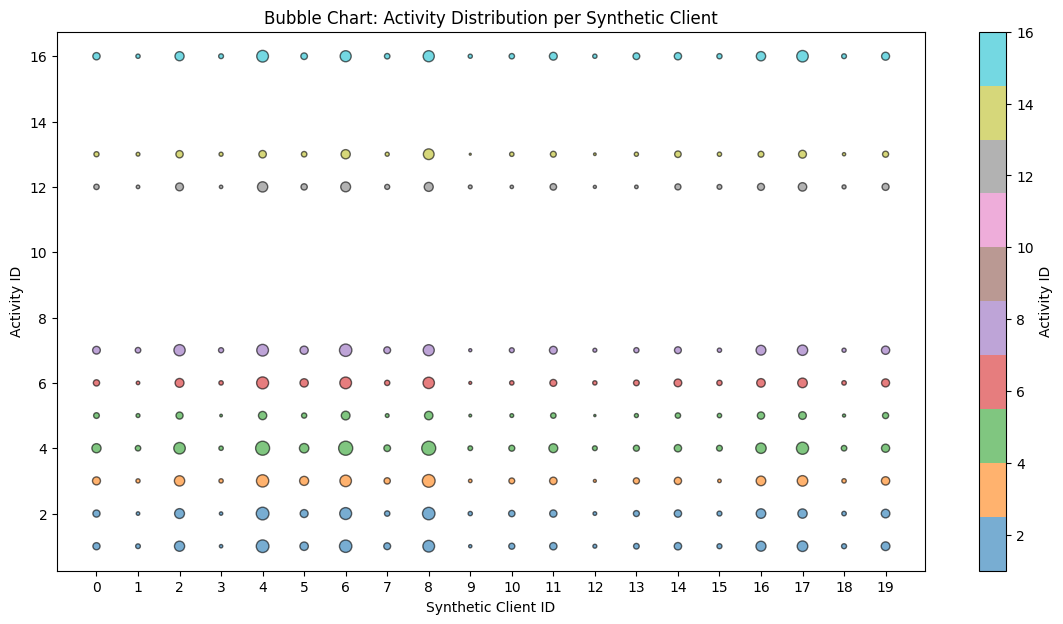

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# activity counts per synthetic client
bubble_data = []

for client_id, data in federated_clients_data.items():
    # combine train + test windows for distribution check
    all_windows = data["train"] + data["test"]
    labels = [label for _, label in all_windows]
    activity_counts = pd.Series(labels).value_counts().to_dict()

    for activity, count in activity_counts.items():
        bubble_data.append((client_id, activity, count))

bubble_df = pd.DataFrame(bubble_data, columns=["Client", "Activity", "Count"])

plt.figure(figsize=(14,7))
scatter = plt.scatter(
    x=bubble_df["Client"],
    y=bubble_df["Activity"],
    s=bubble_df["Count"]*0.5,  # bubble size scale adjust karo agar bohot bada dikh raha ho
    alpha=0.6,
    c=bubble_df["Activity"],
    cmap="tab10",
    edgecolors="k"
)

plt.xticks(range(0,20))  # clients 0–19
plt.xlabel("Synthetic Client ID")
plt.ylabel("Activity ID")
plt.title("Bubble Chart: Activity Distribution per Synthetic Client")
plt.colorbar(scatter, label="Activity ID")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import numpy as np
import os

# ----------------------
# 1. Use the NEW global split
# ----------------------
# Tumne pehle hi banaya tha:
# global_train_windows, global_test_windows

X_global_train = np.array([w[0] for w in global_train_windows])
y_global_train = np.array([w[1] for w in global_train_windows])

X_global_test = np.array([w[0] for w in global_test_windows])
y_global_test = np.array([w[1] for w in global_test_windows])

print("X_train:", X_global_train.shape, "y_train:", y_global_train.shape)
print("X_test:", X_global_test.shape, "y_test:", y_global_test.shape)


X_train: (3307, 200, 42) y_train: (3307,)
X_test: (1653, 200, 42) y_test: (1653,)


In [ ]:
# ----------------------
# 2. Map labels to 0..num_classes-1
# ----------------------
keep_classes = [1,2,3,4,5,6,7,12,13,16]
label_map = {orig_label: i for i, orig_label in enumerate(keep_classes)}

y_train_mapped = np.array([label_map[label] for label in y_global_train])
y_test_mapped  = np.array([label_map[label] for label in y_global_test])

print("Unique train labels:", np.unique(y_train_mapped))
print("Unique test labels:", np.unique(y_test_mapped))

Unique train labels: [0 1 2 3 4 5 6 7 8 9]
Unique test labels: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
num_features = X_global_train.shape[2]
num_classes = len(y_train_mapped)


def build_global_cnn(input_shape=(200,num_features), num_classes=num_classes):
    model = models.Sequential()

    # Conv Layer 1
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Conv Layer 2
    model.add(layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(layers.MaxPooling1D(pool_size=2))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.3))

    # Flatten + Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [ ]:
global_model = build_global_cnn()

global_model.compile(
    optimizer=optimizers.SGD(learning_rate=0.005, momentum=0.9),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

global_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 200, 64)        │         8,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 100, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3307)           │       426,603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,279,531 (4.88 MB)

 Trainable params: 1,279,147 (4.88 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = global_model.fit(
    X_global_train, y_train_mapped,
    epochs=30,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    shuffle=True
)

Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 7s 125ms/step - accuracy: 0.2445 - loss: 5.7835 - val_accuracy: 0.1526 - val_loss: 11.3806
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.7286 - loss: 0.8582 - val_accuracy: 0.2553 - val_loss: 7.2609
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.8007 - loss: 0.6706 - val_accuracy: 0.2236 - val_loss: 6.6114
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.8578 - loss: 0.5050 - val_accuracy: 0.2085 - val_loss: 5.6791
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.8673 - loss: 0.4383 - val_accuracy: 0.2613 - val_loss: 4.4309
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8798 - loss: 0.3942 - val_accuracy: 0.5574 - val_loss: 1.8827
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.8922 - loss: 0.3586 - val_accuracy: 0.5589 - val_loss: 2.0811
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.9117 - loss: 0.3124 - val_accuracy: 0.5151

In [ ]:
test_loss, test_acc = global_model.evaluate(X_global_test, y_test_mapped, verbose=0)
print(f"✅ Global CNN Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# ----------------------
# 6. Save Model
# ----------------------
folder = "/content/drive/MyDrive/PFL-XAI/global_model"
os.makedirs(folder, exist_ok=True)
global_model.save(os.path.join(folder, 'global_cnn.keras'))
global_model.save(os.path.join(folder, 'global_cnn.h5'))

✅ Global CNN Test Accuracy: 0.9068, Test Loss: 0.3345


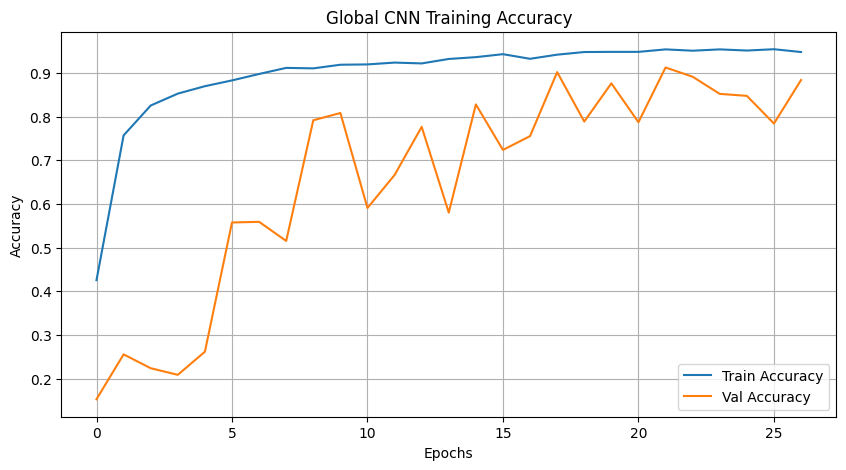

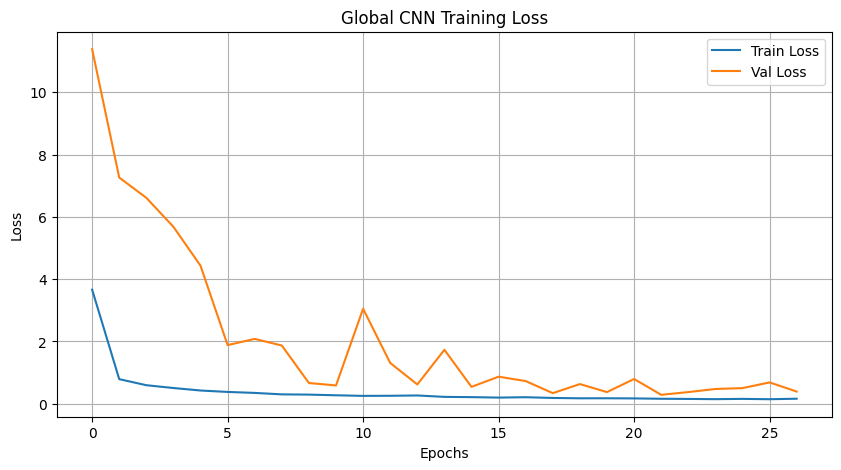

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Global CNN Training Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Global CNN Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import os
import numpy as np

export_folder = "/content/drive/MyDrive/PFL-XAI/clients_data"
os.makedirs(export_folder, exist_ok=True)

for client_id, data in federated_clients_data.items():
    # separate train/test
    train_windows = data["train"]
    test_windows = data["test"]

    # --- Train ---
    X_train = np.array([w[0] for w in train_windows])
    y_train = np.array([label_map[w[1]] for w in train_windows])
    np.savez_compressed(
        os.path.join(export_folder, f"client_{client_id}_train.npz"),
        X=X_train,
        y=y_train
    )

    # --- Test ---
    X_test = np.array([w[0] for w in test_windows])
    y_test = np.array([label_map[w[1]] for w in test_windows])
    np.savez_compressed(
        os.path.join(export_folder, f"client_{client_id}_test.npz"),
        X=X_test,
        y=y_test
    )

    print(f"✅ Exported client_{client_id}: {X_train.shape[0]} train, {X_test.shape[0]} test")


✅ Exported client_0: 340 train, 168 test
✅ Exported client_1: 129 train, 64 test
✅ Exported client_2: 619 train, 306 test
✅ Exported client_3: 113 train, 57 test
✅ Exported client_4: 913 train, 450 test
✅ Exported client_5: 404 train, 200 test
✅ Exported client_6: 900 train, 444 test
✅ Exported client_7: 222 train, 110 test
✅ Exported client_8: 897 train, 443 test
✅ Exported client_9: 87 train, 43 test
✅ Exported client_10: 183 train, 91 test
✅ Exported client_11: 361 train, 178 test
✅ Exported client_12: 93 train, 46 test
✅ Exported client_13: 203 train, 101 test
✅ Exported client_14: 336 train, 166 test
✅ Exported client_15: 159 train, 79 test
✅ Exported client_16: 546 train, 269 test
✅ Exported client_17: 681 train, 336 test
✅ Exported client_18: 134 train, 66 test
✅ Exported client_19: 421 train, 208 test


In [ ]:

# Save global test dataset
export_folder = "/content/drive/MyDrive/PFL-XAI/global_data"
os.makedirs(export_folder, exist_ok=True)

X_global_test = np.array([w[0] for w in global_test_windows])
y_global_test = np.array([label_map[w[1]] for w in global_test_windows]) # Use label_map for consistency

np.savez_compressed(
    os.path.join(export_folder, "global_test.npz"),
    X=X_global_test,
    y=y_global_test
)

print("✅ Global test dataset saved.")

✅ Global test dataset saved.
